## Edge detector

In [ ]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [14]:

def edge_corner(img):    
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # find Harris corners
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray,2,3,0.04)
    dst = cv.dilate(dst,None)
    ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
    dst = np.uint8(dst)

    # find centroids
    ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

    # define the criteria to stop and refine the corners
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

    # Now draw them
    res = np.hstack((centroids,corners))
    res = np.int0(res)

    img[res[:,1],res[:,0]]=[0,0,255]    #red color to mark Harris Corners
    img[res[:,3],res[:,2]] = [0,255,0]  #green color to mark refined corners

    f_corners=[res[:,3],res[:,2]]    #this are the corners we want

    #cv.imwrite('subpixel5.png',img)
    #plt.imshow(img)

    for i in corners:
        #print (i)
        x,y = i.ravel()
        #cv2.circle(img,(x,y),5,(0,0,255),-1)
        cv.circle(img, (int(x), int(y)), 5, (0, 255, 0), -1)

    plt.imshow(img)
    return f_corners

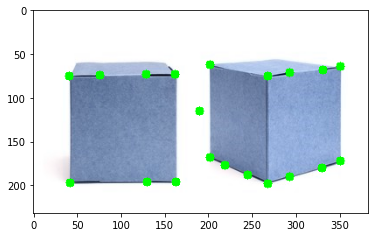

In [15]:
img = cv.imread("C:/Users/Natalia/Documents/CBS/Semester 4 Thesis/NORMAL/other/picture/two_b1.jpg")
corners= edge_corner(img)

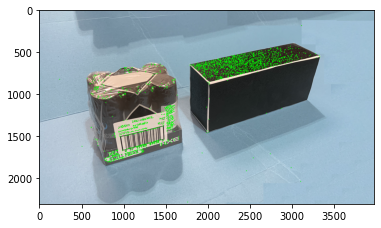

In [16]:
img2 = cv.imread("C:/Users/Natalia/Documents/CBS/Semester 4 Thesis/NORMAL/other/picture/new.jpg")
corners= edge_corner(img2)